In [1]:
#pip install xgboost

In [2]:
#pip install missingno

In [3]:
#pip install imbalanced-learn


In [4]:
#pip show scikit-learn
#pip show imbalanced-learn


In [5]:
#pip install --upgrade scikit-learn imbalanced-learn


In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from collections import Counter
import seaborn as sns
import missingno as msno

#Data Preprocesssing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Evaluation metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings ("ignore")

In [8]:
#import the data set into the notebook
data =pd.read_csv(r"/Users/admin/Downloads/Customer-Churn.csv")

In [9]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:

# Convert "TotalCharges" from object to float, handling errors
data['TotalCharges'] = data['TotalCharges'].str.strip().replace('', np.nan).astype(float)


# Check the data types
print(data.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [12]:
#check for missing data
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
#checking the missing data features
data[data.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


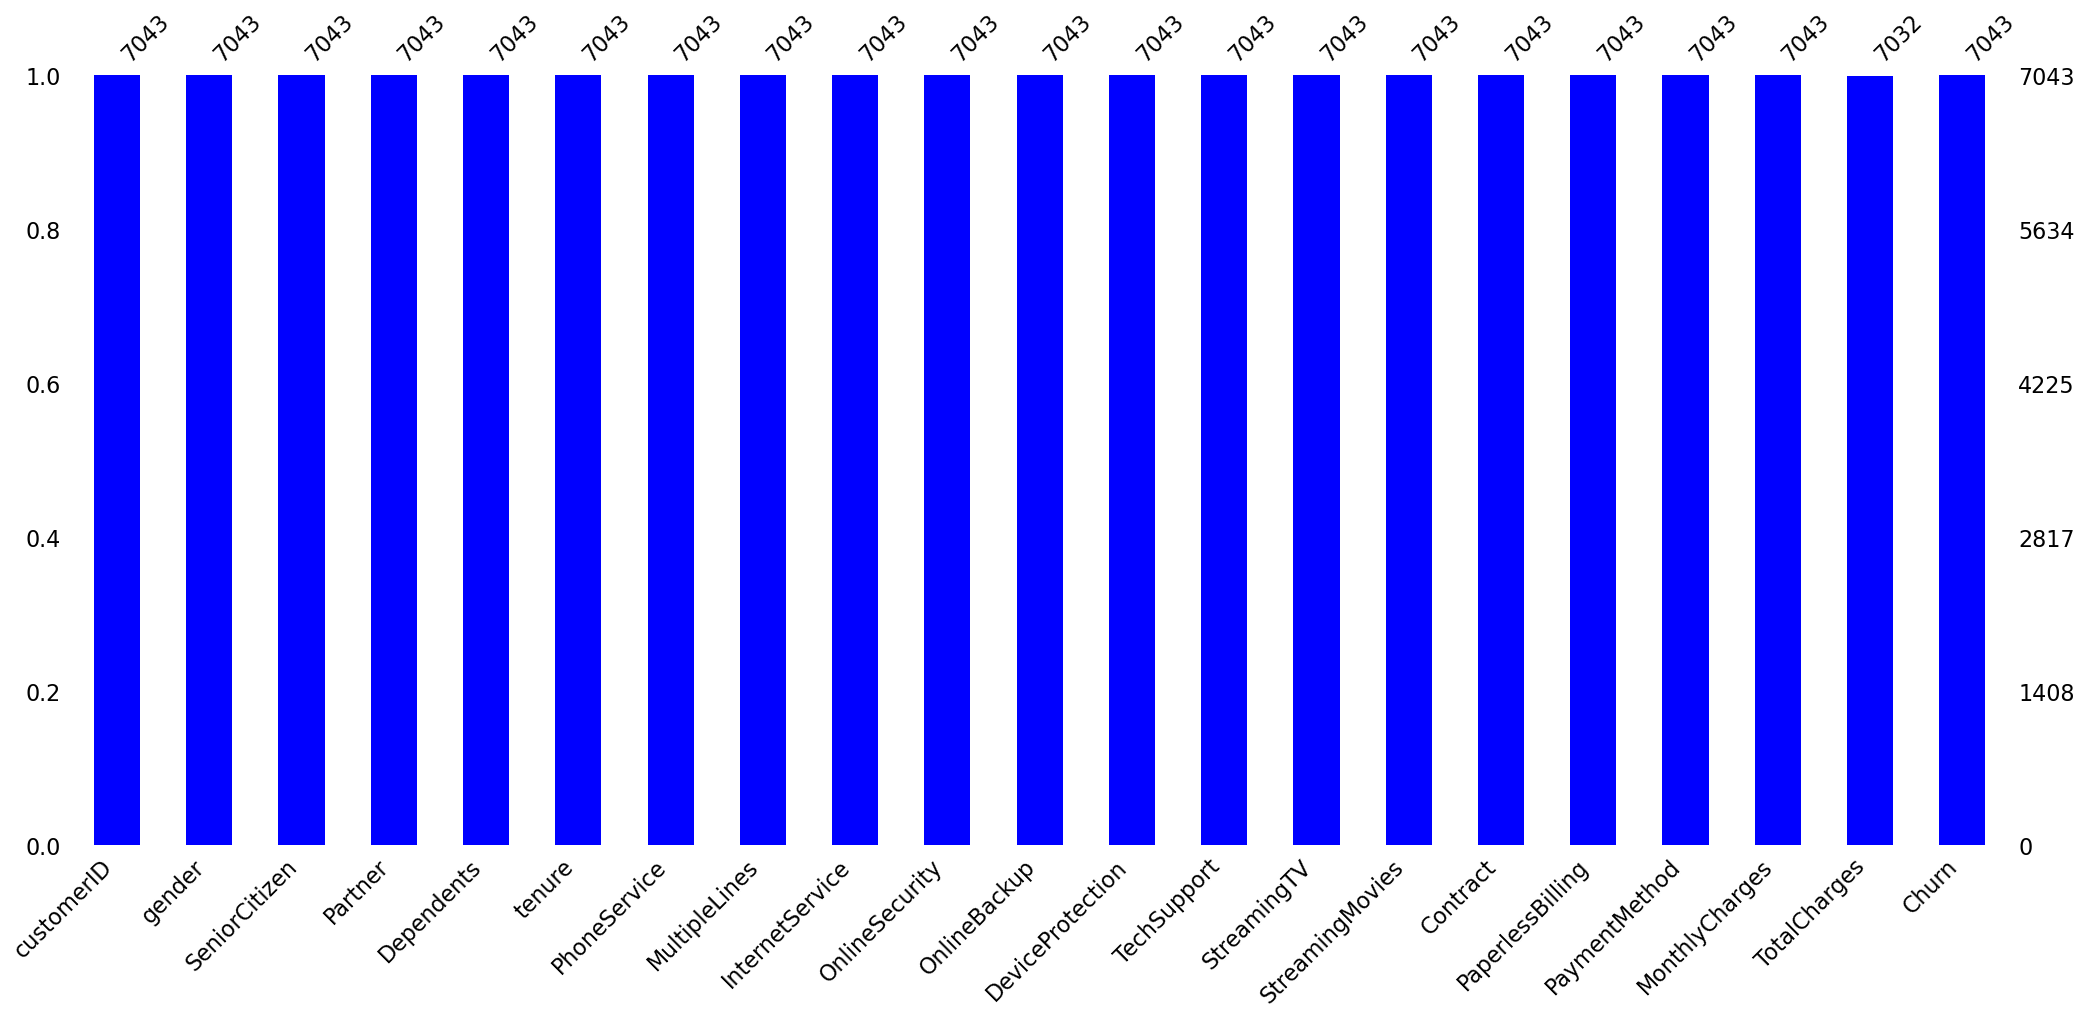

In [14]:
#visualizing the missing data
msno.bar(data, color="blue");

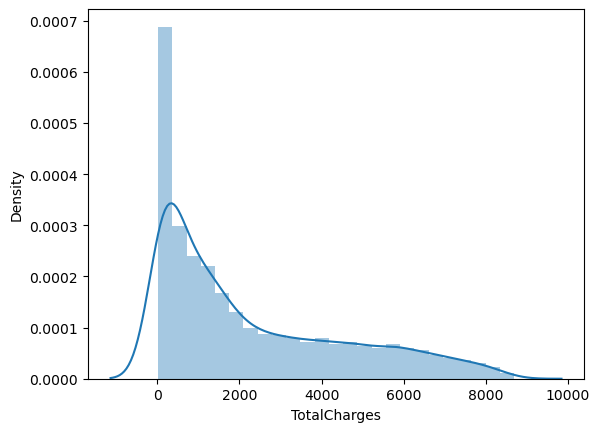

In [15]:
sns.distplot(data['TotalCharges']);

In [16]:
#Replacing the missing data with the median value
median_value = data['TotalCharges'].median()
data['TotalCharges'].fillna(median_value, inplace=True)

In [17]:
#cross-check for missing data
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
# Check for data duplicates
data.duplicated().sum()

0

## Univariate Analysis 

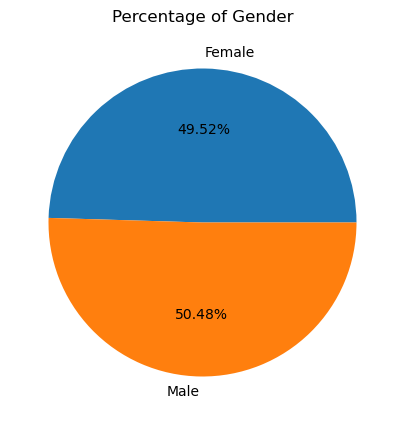

In [21]:
fig, ax=plt.subplots(figsize=(5,5))
count =Counter(data['gender'])

ax.pie(count.values(),labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of Gender");

# Observation
- 50.47% of the total customers are Male

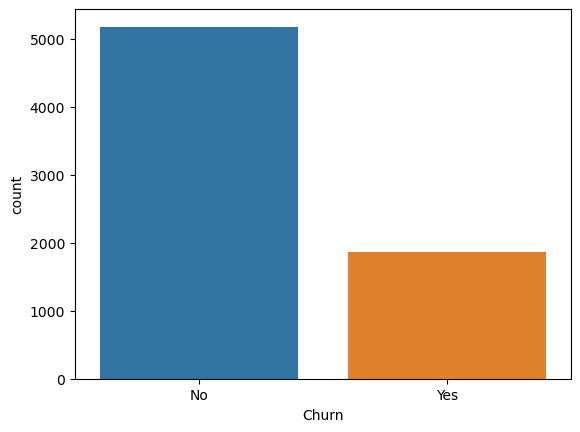

In [22]:
sns.countplot(data=data, x="Churn");

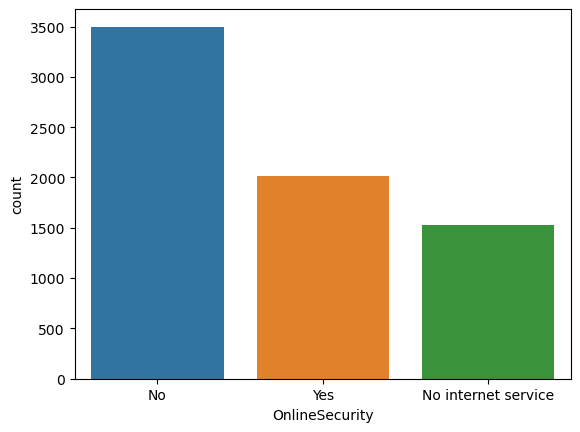

In [23]:
sns.countplot(data=data, x="OnlineSecurity");

# Observation
- Majourity of the customers have no Online Security 

In [24]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='MonthlyCharges'>

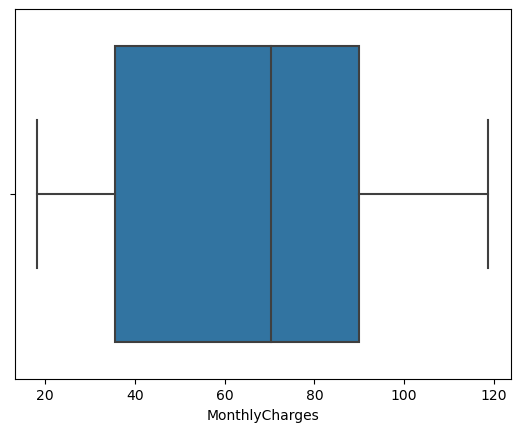

In [26]:
sns.boxplot(x= data["MonthlyCharges"])

# Observation 
- No outliers in the Monthly Charges that is there is no customer paying extremely high amount comoared to others

<Axes: xlabel='TotalCharges'>

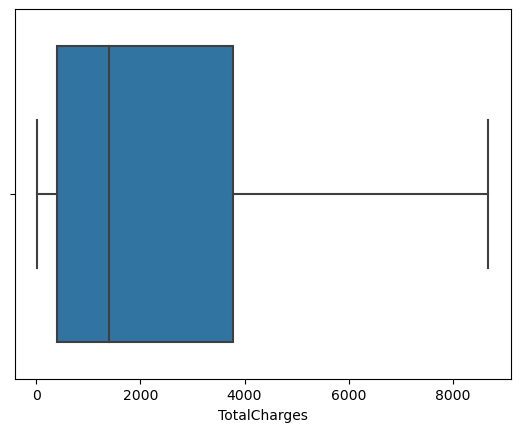

In [27]:
sns.boxplot(x= data["TotalCharges"])

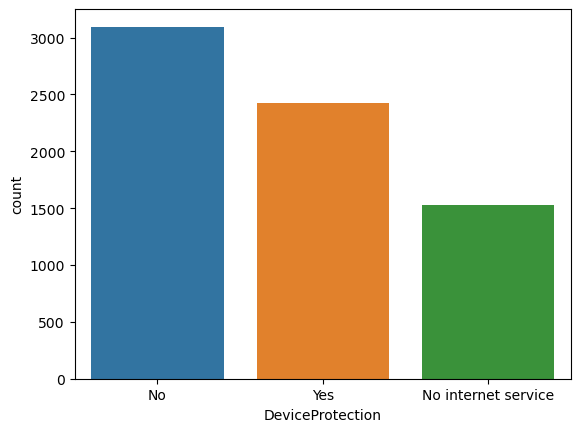

In [28]:
sns.countplot(data=data, x="DeviceProtection");

# Observation
- Majourity of the customers have no Device Protection

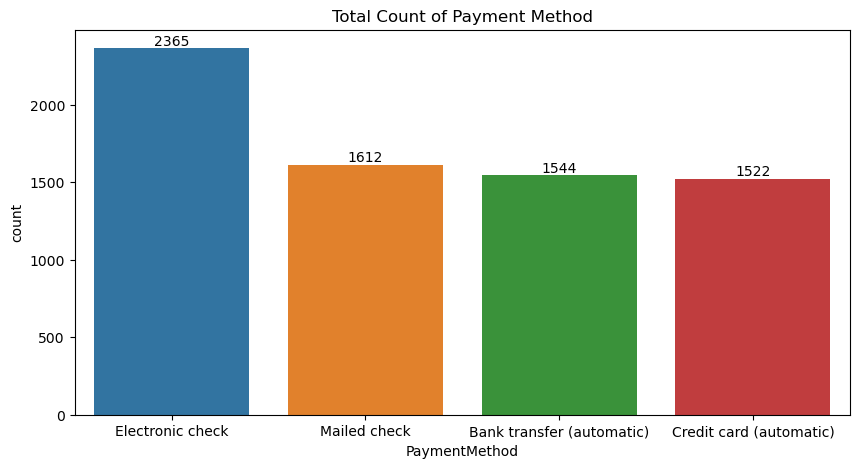

In [29]:
plt.subplots(figsize=(10,5))
ax= sns.countplot(data=data, x="PaymentMethod", order= data["PaymentMethod"].value_counts(ascending=False).index)
values = data["PaymentMethod"]. value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
ax.set_title("Total Count of Payment Method")
plt.show();

# Observation
- The widely used Payment Method is the Electronic Check, followed by the mailed check, Bank transfer (automatic) and the least usd is Credit Card(autoimatic)

In [30]:
def cust_loyalty(x):
    if x <= 10:
        return "<= 10years"
    elif x <=20:
        return "<= 20 years"
    elif x<= 30:
        return "<= 30 years"
    elif x<= 40:
        return "<= 40 years"
    elif x<= 50:
        return "<= 50 years"
    elif x<= 60:
        return "<= 60 years"
    else:
        return "61 years and above"
    
data['cust_loyalty']= data['tenure'].apply(cust_loyalty)
data.head()   

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cust_loyalty
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,<= 10years
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,<= 40 years
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,<= 10years
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,<= 50 years
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,<= 10years


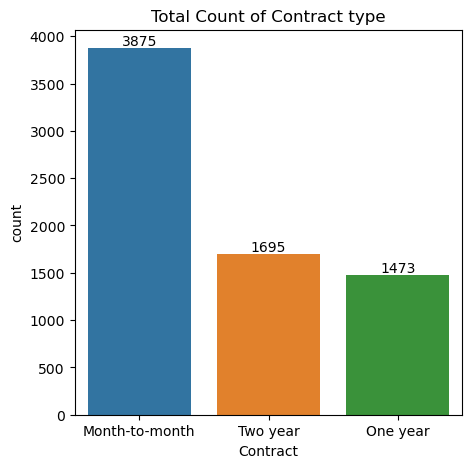

In [31]:
plt.subplots(figsize=(5,5))
ax= sns.countplot(data=data, x="Contract",order = data["Contract"].value_counts(ascending=False).index)
values = data["Contract"]. value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
ax.set_title("Total Count of Contract type")
plt.show();

# Observation
- Based on the contract type we have more customers on the Month-to-Month Contract followed by Two year contracty and lastly One year contract

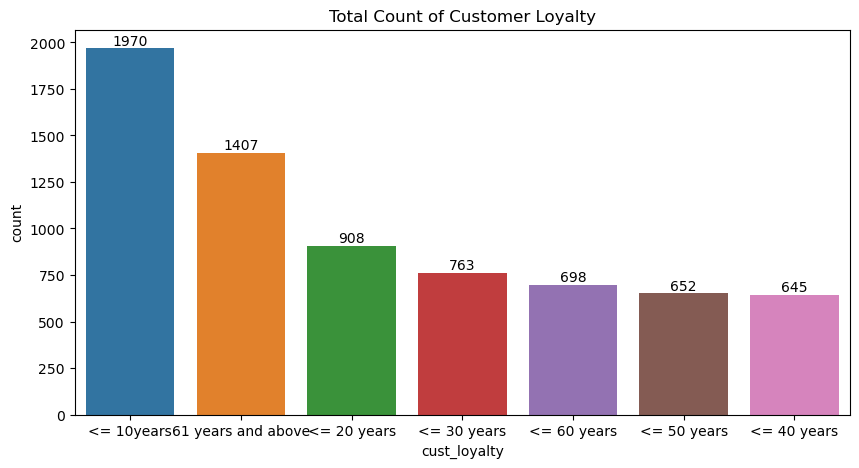

In [32]:
plt.subplots(figsize=(10,5))
ax= sns.countplot(data=data, x="cust_loyalty",order = data["cust_loyalty"].value_counts(ascending=False).index)
values = data["cust_loyalty"]. value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
ax.set_title("Total Count of Customer Loyalty")
plt.show();

# Observation
- Customers whose tenure is less than 10 years ago ranks the highest total number of customers, followed by those with their tenure 61 years and above, the least being those whoes tuenure are greater than 30 years but less than 40 years

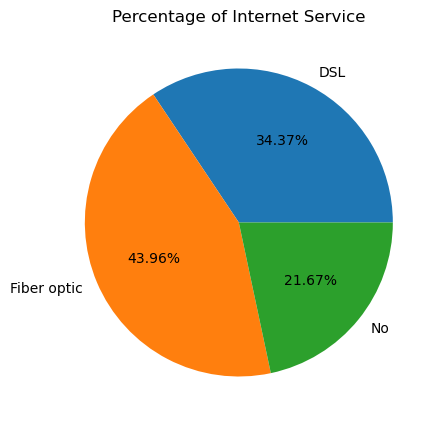

In [33]:
fig, ax=plt.subplots(figsize=(5,5))
count =Counter(data['InternetService'])

ax.pie(count.values(),labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of Internet Service");

# Observation
- Majourity of the customers 44.03% make use of Fiber Optic Internet Service followed by DSL 34.36% and lastly 21.62% of the total customers has no internet service at all

## Bivariate Analysis

In [34]:
# grouping churn if yes=1 and no=0
def new_churn(x):
    if x == "Yes":
        return 1
    else:
        return 0
data["new_churn"]= data["Churn"].apply(new_churn)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cust_loyalty,new_churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,<= 10years,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,<= 40 years,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,<= 10years,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,<= 50 years,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,<= 10years,1


Text(0.5, 1.0, 'InternetService and Churn')

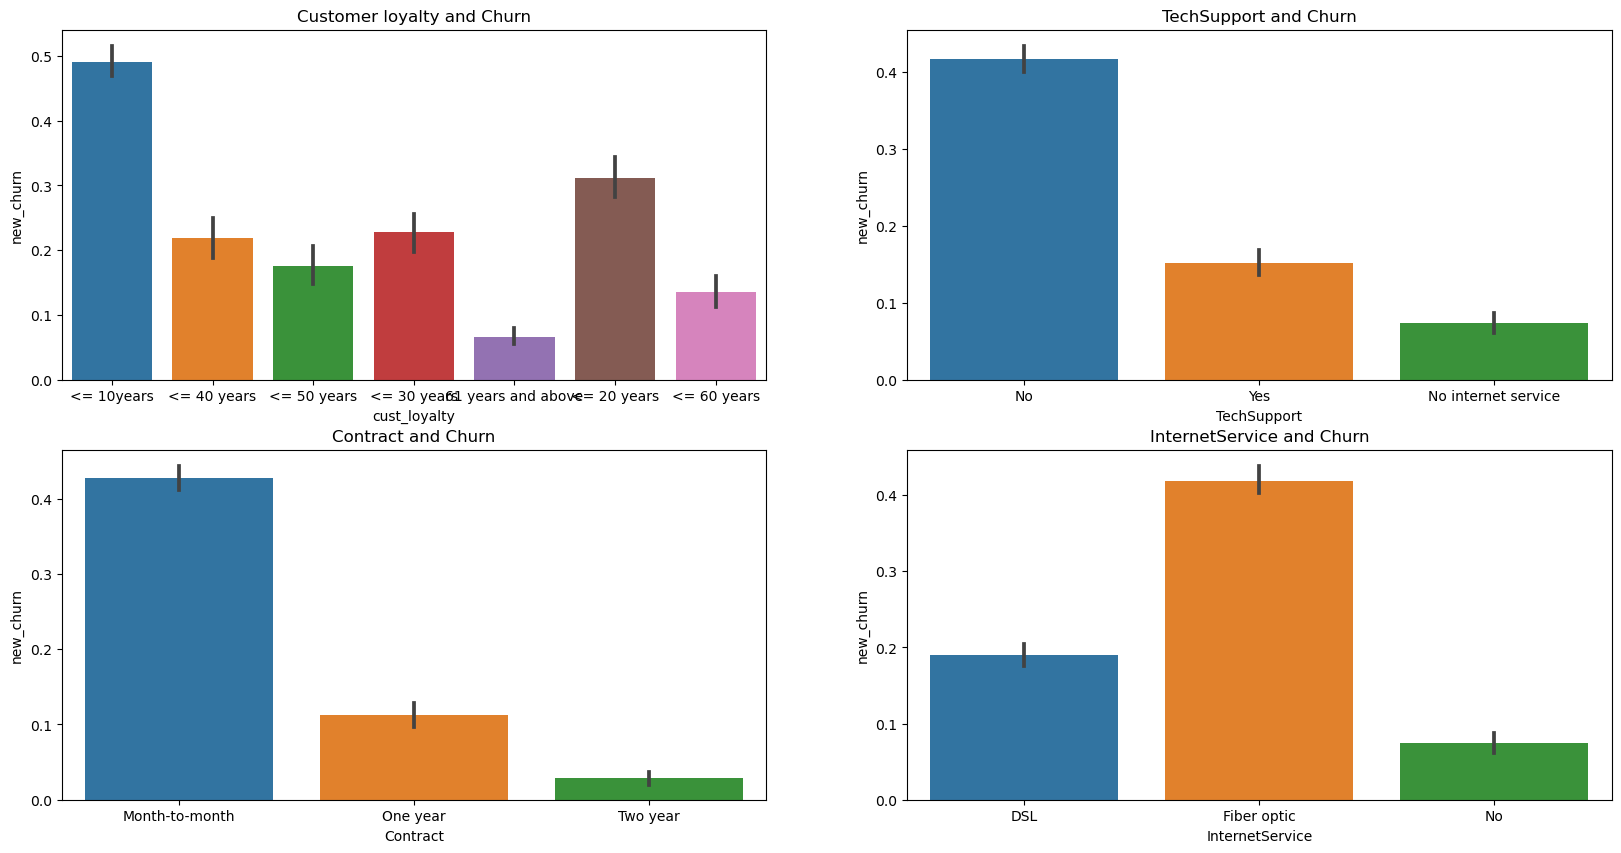

In [35]:
# Relationship between customer loyalty, contract, techsupport, internet service with churn 

fig, axs=plt.subplots(nrows=2, ncols= 2, figsize=(20,10))
sns.barplot(x='cust_loyalty', y= 'new_churn', data= data, ax=axs[0,0])
axs[0,0].set_title("Customer loyalty and Churn")

sns.barplot(x='TechSupport', y= 'new_churn', data= data, ax=axs[0,1])
axs[0,1].set_title("TechSupport and Churn")

sns.barplot(x='Contract', y= 'new_churn', data= data, ax=axs[1,0])
axs[1,0].set_title("Contract and Churn")

sns.barplot(x='InternetService', y= 'new_churn', data= data, ax=axs[1,1])
axs[1,1].set_title("InternetService and Churn")


## Observation
- the new customers who just joined less than 10 years left the company more 
- Majourity of those that has no tech support left
- Those with the monthly contract type rank high in leaving followed by one year contract then two years 
- fiber optic users churn more followed by DSL and those who have no internent service at all

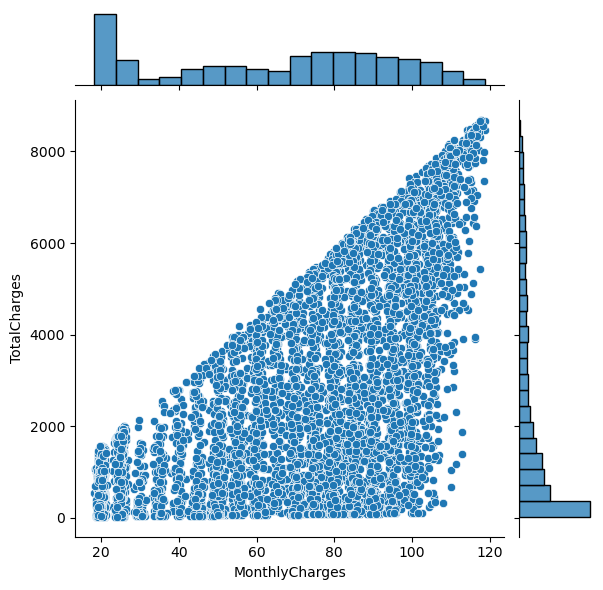

In [36]:
sns.jointplot(x='MonthlyCharges', y= 'TotalCharges', data= data)

In [37]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,new_churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [38]:
#grouping the monthly charges 

def new_monthcharge(x):
    if x<= 20:
        return "fair"
    if x<= 40:
        return "low"
    if x<= 60:
        return "medium"
    if x<= 80:
        return "high"
    else:
        return "Extreme"
data["new_monthcharge"]= data["MonthlyCharges"].apply(new_monthcharge)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cust_loyalty,new_churn,new_monthcharge
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,<= 10years,0,low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,<= 40 years,0,medium
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,<= 10years,1,medium
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,<= 50 years,0,medium
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,<= 10years,1,high


In [39]:
#grouping the total charges 

def new_totalcharge(x):
    if x<= 1500:
        return "Class A"
    if x<= 3000:
        return "Class B"
    if x<= 4500:
        return "Class C"
    if x<= 6000:
        return "Class D"
    if x<= 7500:
        return "Class E"
    else:
        return "High Class"
data["new_totalcharge"]= data["TotalCharges"].apply(new_totalcharge)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cust_loyalty,new_churn,new_monthcharge,new_totalcharge
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,<= 10years,0,low,Class A
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,<= 40 years,0,medium,Class B
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,<= 10years,1,medium,Class A
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,<= 50 years,0,medium,Class B
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,<= 10years,1,high,Class A


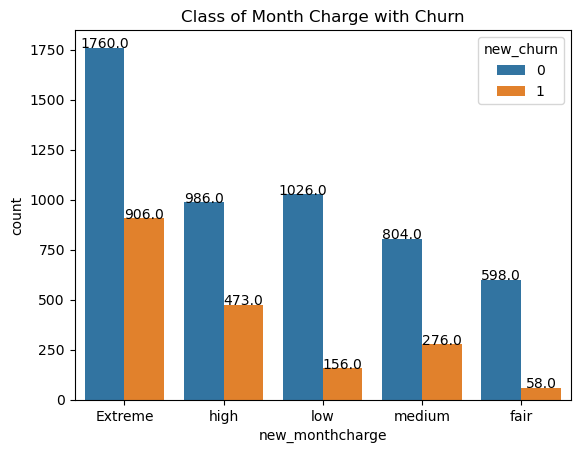

In [40]:
mc=sns.countplot(x='new_monthcharge', hue= 'new_churn', data= data, order= data['new_monthcharge'].value_counts(ascending= False).index)
for p in mc.patches:
    mc.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')
mc.set_title("Class of Month Charge with Churn")
plt.show();

# Observation
- There were a total of 2,736 customers categorized as having extreme monthly charges.Out of these, 1,758 (approximately 64.2%) did not churn, while 978 (approximately 35.8%) did churn.customers with extremely monthly charges are significantly less likely to churn. 
- There were a total of 1,078 customers categorized as having medium monthly charges.Out of these, 802 (approximately 74.4%) did not churn, while 276 (approximately 25.6%) did churn.Customers with medium monthly charges have a relatively higher churn rate compared to those with high or extreme charges
- There were a total of 1,179 customers categorized as having low monthly charges.Out of these, 1,023 (approximately 86.7%) did not churn, while 156 (approximately 13.3%) did churn.Customers with low monthly charges have a relatively low churn rate, indicating that they are more inclined to stay with the company due to cost-effective pricing.
- There were a total of 653 customers categorized as having fair monthly charges.Out of these, 595 (approximately 91.1%) did not churn, while 58 (approximately 8.9%) did churn Customers with fair monthly charges also have a relatively low churn rate, similar to those with low charges

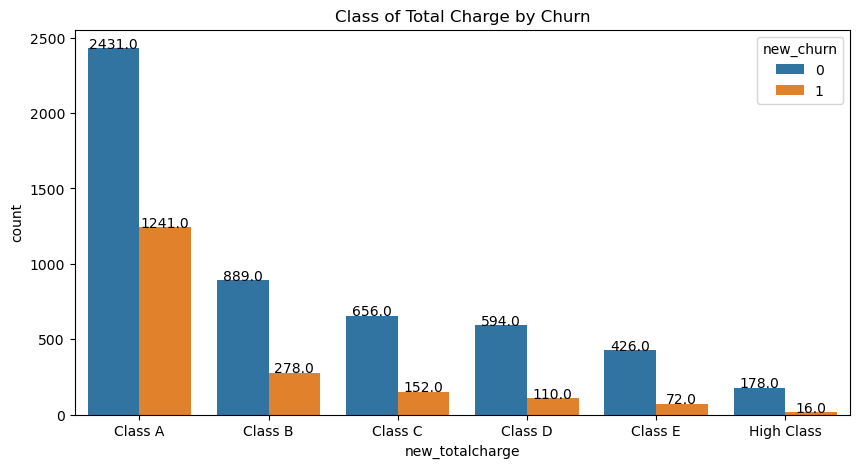

In [41]:
fig, axs=plt.subplots(figsize=(10,5))
tc=sns.countplot(x='new_totalcharge', hue= 'new_churn', data= data, order = data['new_totalcharge'].value_counts(ascending=False).index)

for p in tc.patches:
    tc.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')
tc.set_title("Class of Total Charge by Churn")
plt.show();

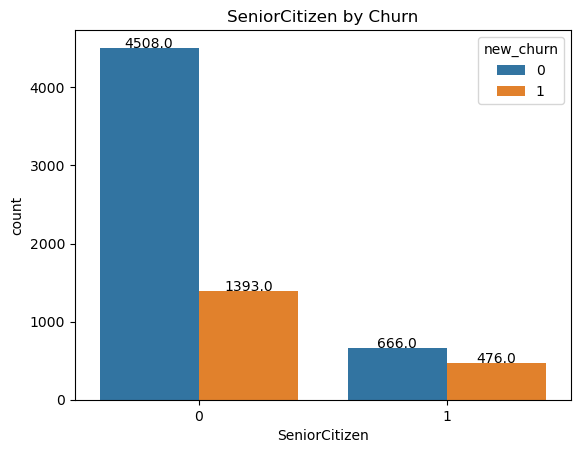

In [42]:
sc=sns.countplot(x='SeniorCitizen', data= data, hue='new_churn', order= data['SeniorCitizen'].value_counts(ascending= False).index)
for p in sc.patches:
    sc.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')
sc.set_title("SeniorCitizen by Churn")
plt.show();

# Observation
- Total customers who are not Senior Citizens: 5,890.
Out of these, 4,497 (approximately 76.2%) did not churn, while 1,393 (approximately 23.8%) did churn.
Customers who are not Senior Citizens have a relatively lower churn rate, indicating that they are less likely to leave the company's services.
- Total customers who are Senior Citizens: 1,142.
Out of these, 666 (approximately 58.3%) did not churn, while 476 (approximately 41.7%) did churn.
Customers who are Senior Citizens have a relatively higher churn rate compared to those who are not Senior Citizens. This suggests that Senior Citizens are more likely to churn

In [43]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'cust_loyalty', 'new_churn', 'new_monthcharge', 'new_totalcharge'],
      dtype='object')

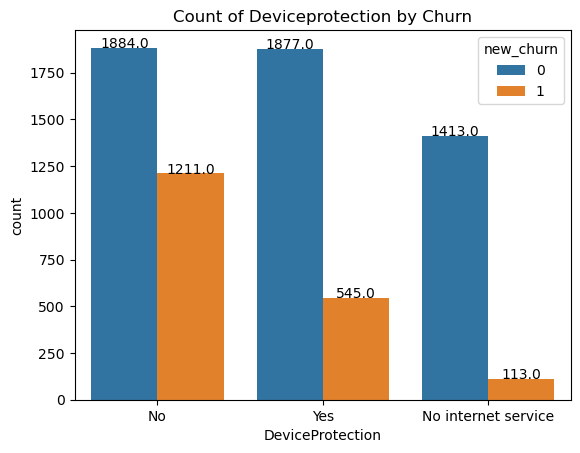

In [44]:
dp=sns.countplot(x='DeviceProtection', data= data, hue='new_churn', order= data['DeviceProtection'].value_counts(ascending= False).index)
for p in dp.patches:
    dp.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')
dp.set_title("Count of Deviceprotection by Churn")
plt.show();

# Multivariate Analysis

<Axes: >

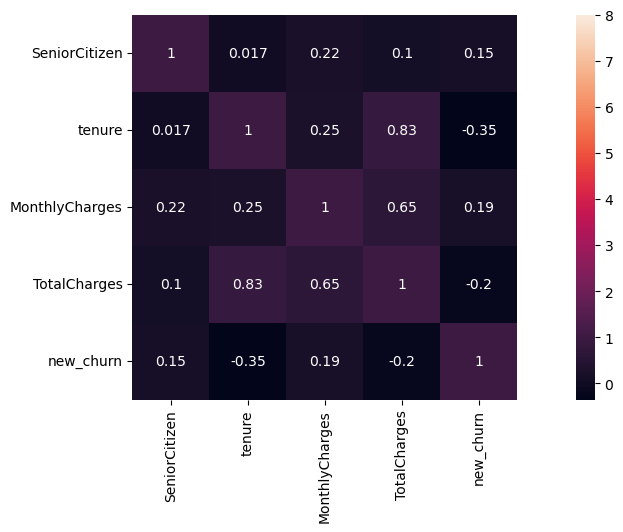

In [45]:
plt.figure(figsize=(15,5))
ct=data.corr()
sns.heatmap(ct, vmax=8, square= True, annot=True)

# MACHINE LEARNING


# Feature Enginerring and Data Preprocessing

In [46]:
#duplicate the original 
data2=data.copy()

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in data2.columns[0:]:
    if(data2[i].dtype== 'object'):
        data2[i]= encoder.fit_transform(data2[i])
    else:
        data2[i]=data2[i]

data2.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cust_loyalty,new_churn,new_monthcharge,new_totalcharge
0,5375,0,0,1,0,1,0,1,0,0,...,0,1,2,29.85,29.85,0,1,0,3,0
1,3962,1,0,0,0,34,1,0,0,2,...,1,0,3,56.95,1889.50,0,4,0,4,1
2,2564,1,0,0,0,2,1,0,0,2,...,0,1,3,53.85,108.15,1,1,1,4,0
3,5535,1,0,0,0,45,0,1,0,2,...,1,0,0,42.30,1840.75,0,5,0,4,1
4,6511,0,0,0,0,2,1,0,1,0,...,0,1,2,70.70,151.65,1,1,1,2,0


In [48]:
data2.drop(columns= 'customerID', axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cust_loyalty,new_churn,new_monthcharge,new_totalcharge
0,0,0,1,0,1,0,1,0,0,2,...,0,1,2,29.85,29.85,0,1,0,3,0
1,1,0,0,0,34,1,0,0,2,0,...,1,0,3,56.95,1889.50,0,4,0,4,1
2,1,0,0,0,2,1,0,0,2,2,...,0,1,3,53.85,108.15,1,1,1,4,0
3,1,0,0,0,45,0,1,0,2,0,...,1,0,0,42.30,1840.75,0,5,0,4,1
4,0,0,0,0,2,1,0,1,0,0,...,0,1,2,70.70,151.65,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,1,1,3,84.80,1990.50,0,3,0,0,1
7039,0,0,1,1,72,1,2,1,0,2,...,1,1,1,103.20,7362.90,0,0,0,0,4
7040,0,0,1,1,11,0,1,0,2,0,...,0,1,2,29.60,346.45,0,2,0,3,0
7041,1,1,1,0,4,1,2,1,0,0,...,0,1,3,74.40,306.60,1,1,1,2,0


In [49]:
# Normalizing or standardizing the features in the dataset.

from sklearn.preprocessing import MinMaxScaler
''' Assign the MinMaxScaler function to the variable scaler '''
scaler=MinMaxScaler()

''' Reshape each feature with outlier using the scaler-fit-transform function and assigned to new features'''
data2['Scaled_MC']=scaler.fit_transform(data2[['MonthlyCharges']].values.reshape(-1,1))
data2['Scaled_TC']=scaler.fit_transform(data2[['TotalCharges']].values.reshape(-1,1))
data2['Scaled_Tenure']=scaler.fit_transform(data2[['tenure']].values.reshape(-1,1))

''' Drop-off the irrelevant features '''
data2.drop(['MonthlyCharges', 'TotalCharges', 'tenure', 'customerID', 'cust_loyalty', 'new_monthcharge','new_totalcharge','new_churn'], axis=1, inplace=True)

data2.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Scaled_MC,Scaled_TC,Scaled_Tenure
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0.115423,0.001275,0.013889
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0.385075,0.215867,0.472222
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0.354229,0.010310,0.027778
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0.239303,0.210241,0.625000
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0.521891,0.015330,0.027778


In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

X = data2.drop("Churn", axis=1)  # Replace "target_column" with your target variable
y = data2["Churn"]

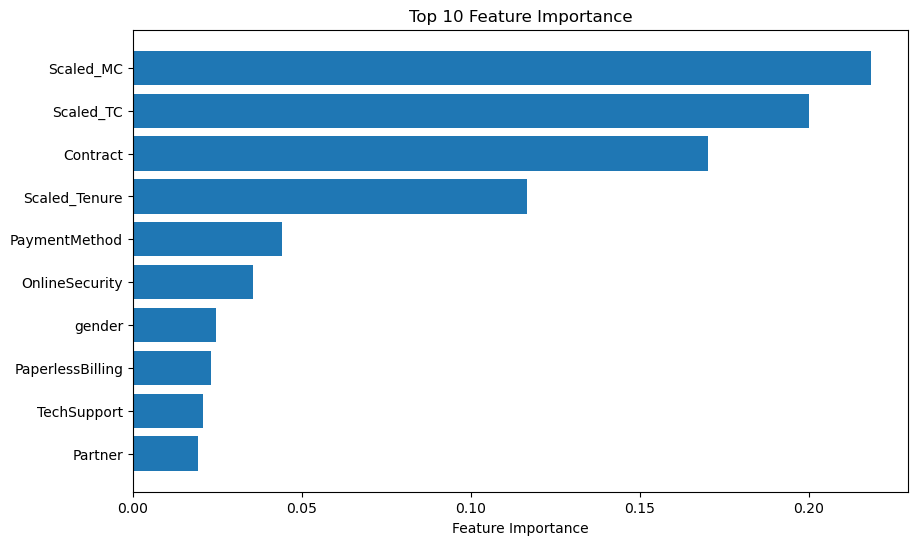

In [51]:
# Step 3: Calculate feature importance and create a plot
  # Replace "target_column" with your target variable

feat_im = RandomForestRegressor()
feat_im.fit(X, y)
feat_name = list(X.columns)
importances = feat_im.feature_importances_

# Create a plot for feature importance
import matplotlib.pyplot as plt

# Example: Plot the top 10 features
indices = importances.argsort()[-10:]
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importance")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feat_name[i] for i in indices])
plt.xlabel("Feature Importance")
plt.show()


In [52]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

feature_to_encode = "Churn"

if data2[feature_to_encode].dtype == 'object':
    data2[feature_to_encode] = encoder.fit_transform(data2[feature_to_encode])

data2.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Scaled_MC,Scaled_TC,Scaled_Tenure
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0.115423,0.001275,0.013889
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0.385075,0.215867,0.472222
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0.354229,0.010310,0.027778
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0.239303,0.210241,0.625000
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0.521891,0.015330,0.027778


In [53]:
#encoding the categorical features to numerical using onehot encoder(get_dummies)
data3 = pd.get_dummies(data, columns= ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])
data3.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,cust_loyalty,new_churn,new_monthcharge,new_totalcharge,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,<= 10years,0,low,Class A,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,No,<= 40 years,0,medium,Class B,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,Yes,<= 10years,1,medium,Class A,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,No,<= 50 years,0,medium,Class B,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,Yes,<= 10years,1,high,Class A,...,0,1,0,0,0,1,0,0,1,0


In [54]:
#dropping off the redundant features and unique identifier
columns_to_drop= ['customerID', 'cust_loyalty', 'new_monthcharge', 'new_totalcharge','new_churn','Churn']
data4= data3.drop(columns= columns_to_drop, axis=1)
data4.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [55]:
# Normalizing or standardizing the features in the dataset.

from sklearn.preprocessing import MinMaxScaler
''' Assign the MinMaxScaler function to the variable scaler '''
scaler=MinMaxScaler()

''' Reshape each feature with outlier using the scaler-fit-transform function and assigned to new features'''
data4['Scaled_MC']=scaler.fit_transform(data4[['MonthlyCharges']].values.reshape(-1,1))
data4['Scaled_TC']=scaler.fit_transform(data4[['TotalCharges']].values.reshape(-1,1))
data4['Scaled_Tenure']=scaler.fit_transform(data4[['tenure']].values.reshape(-1,1))


''' Drop-off the irrelevant features '''
data4.drop(['MonthlyCharges', 'TotalCharges', 'tenure'], axis=1, inplace=True)

data4.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Scaled_MC,Scaled_TC,Scaled_Tenure
0,0,1,0,0,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0.115423,0.001275,0.013889
1,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,0,1,0.385075,0.215867,0.472222
2,0,0,1,1,0,1,0,0,1,1,...,0,0,1,0,0,0,1,0.354229,0.010310,0.027778
3,0,0,1,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0.239303,0.210241,0.625000
4,0,1,0,1,0,1,0,0,1,1,...,0,0,1,0,0,1,0,0.521891,0.015330,0.027778


In [56]:
x= data4
label= data2["Churn"]

In [57]:
label.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Class distribution after SMOTE:
0    5174
1    5174
Name: Churn, dtype: int64


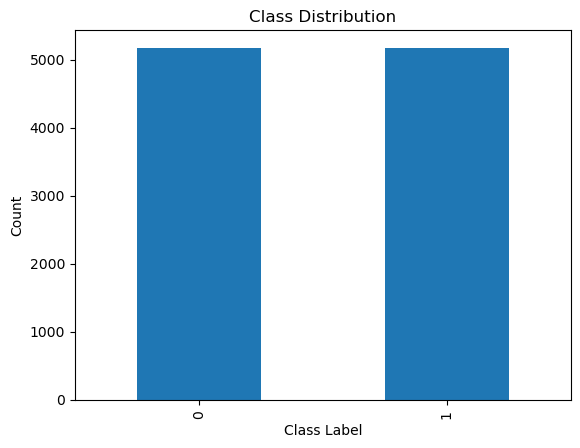

In [58]:
#Balancing the target variable using SMOTE 

smote = SMOTE(sampling_strategy='auto', random_state=42) 
steps= [('o',smote)]
pipeline= Pipeline(steps=steps)

x_resampled, label_resampled = pipeline.fit_resample(x, label)

# Check class distribution after SMOTE
class_distribution = pd.Series(label_resampled).value_counts()

print("Class distribution after SMOTE:")
print(class_distribution)

class_distribution.plot(kind='bar',title='Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()



In [59]:
#spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(x_resampled,label_resampled, test_size=0.3, random_state= 42, stratify= label_resampled )

In [60]:
#8 Machine learning Algorithms will be applied to the dataset

classifiers = [[XGBClassifier(), 'XGB Classifier'], 
               [RandomForestClassifier(), 'Random Forest'], 
               [KNeighborsClassifier(), 'K-Nearest Neighbours'], 
               [SGDClassifier(), 'SGD classifier'], 
               [SVC(), 'SVC'], 
               [GaussianNB(), "Naive Bayes"], 
               [DecisionTreeClassifier(random_state = 42), "Decision Tree"], 
               [LogisticRegression(), 'Logistic Regression']
              ]

In [61]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}


for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name= classifier[1]
    
    pred = model.predict(X_test)

    a_score = accuracy_score(y_test, pred)
    P_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(P_score*100, 2)) + '%']) 
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [62]:

print("Accuracy Score")
ac = pd.DataFrame(acc_list)
ac.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,84.32%,84.83%,81.13%,84.38%,84.7%,75.88%,78.26%,84.38%


In [63]:
print("Recall")
re = pd.DataFrame(recall_list)
re.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,86.47%,87.69%,90.72%,85.12%,86.4%,86.15%,78.61%,86.98%


In [64]:
print("Precision List")
pr = pd.DataFrame(precision_list)
pr.head()

Precision List


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,82.89%,82.94%,76.11%,83.87%,83.55%,71.46%,78.06%,82.67%


In [65]:
print("Roc Score")
ro = pd.DataFrame(roc_list)
ro.head()

Roc Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,84.32%,84.83%,81.13%,84.38%,84.7%,75.88%,78.26%,84.38%


In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


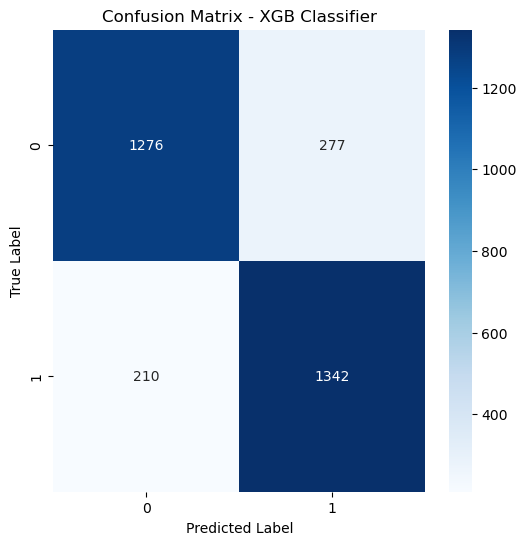

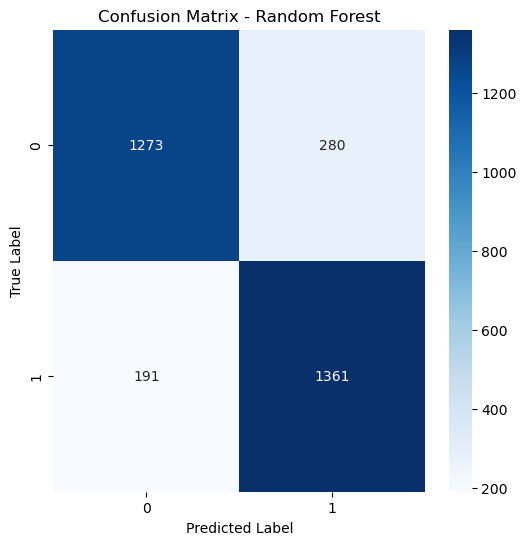

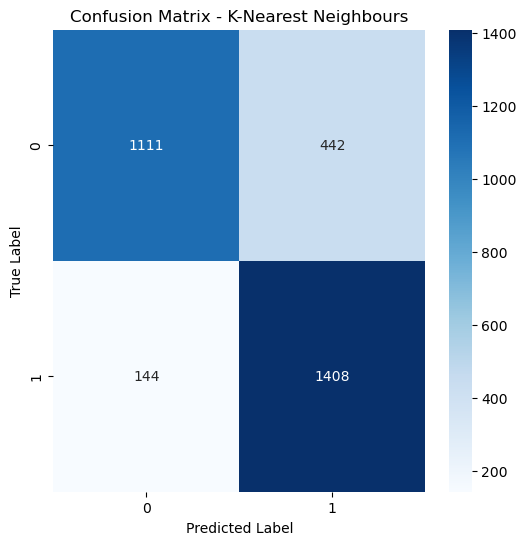

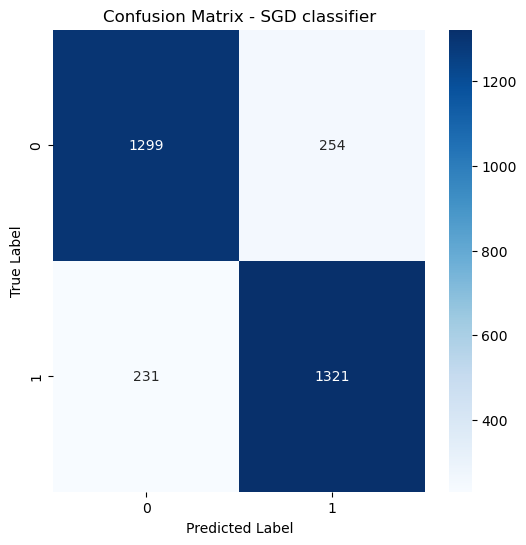

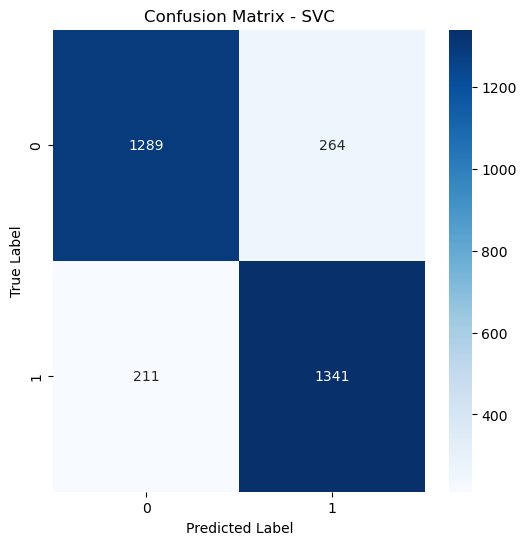

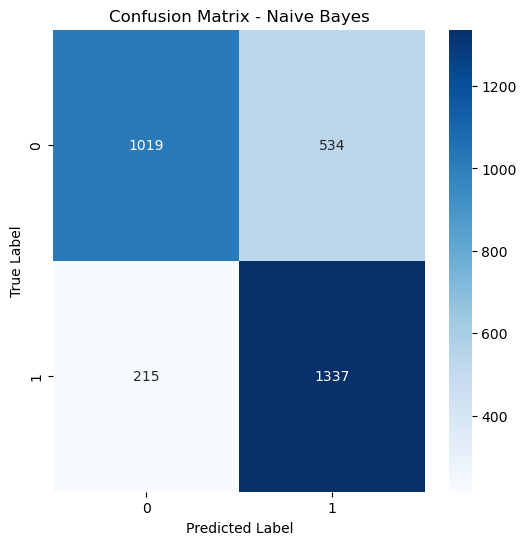

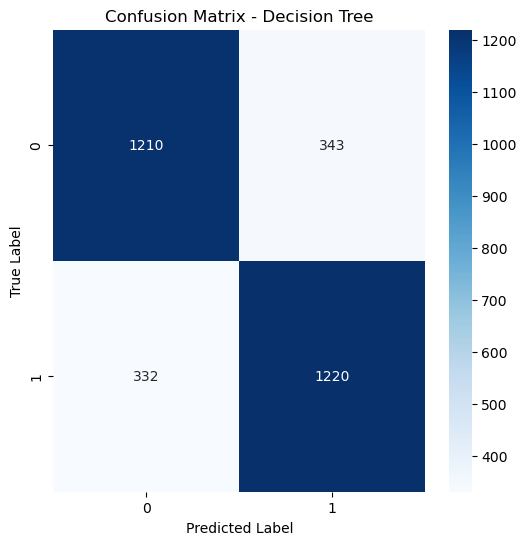

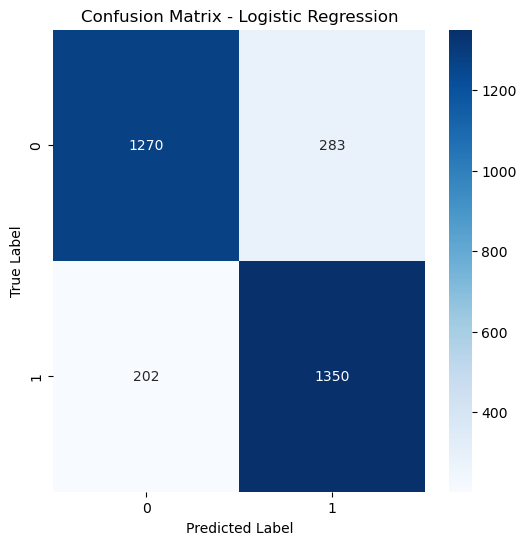

In [70]:
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    
    pred = model.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, pred)

    # Plot the confusion matrix 
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot = True, cmap = "Blues", fmt = "g")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show();
